In [1]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import math

2024-03-27 18:21:36.340758: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


<h1>Trying to do shot noise thresholding</h1>

0 0 90
total N 14355
N_amount 100
average N 143.55
N 143.55
lower 131.5687646713705
higher 155.53123532862952
(32, 32)


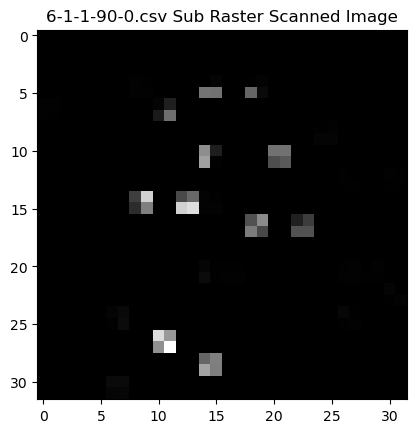

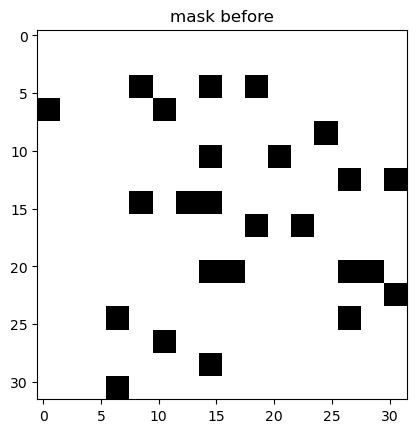

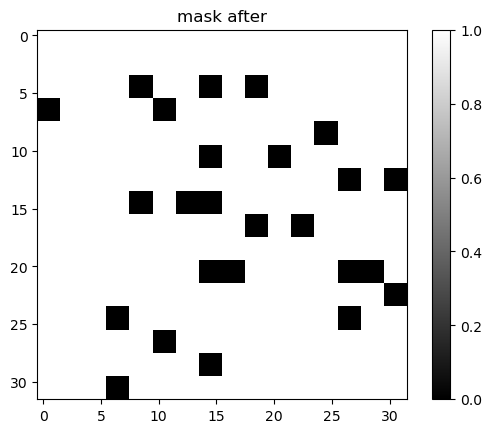

(32, 32)
(32, 32)


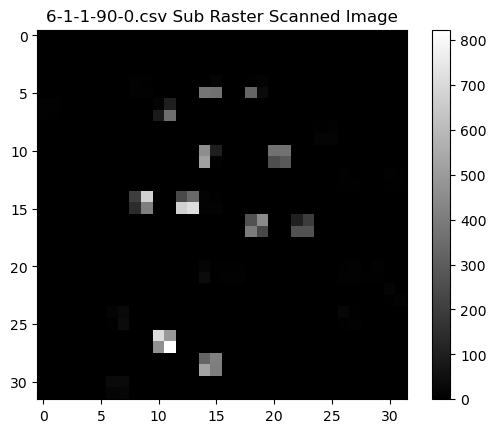

NameError: name 'N_median' is not defined

In [3]:
import os
import cv2
import math
import string
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

write_files = False

for letter in range(0, 10):
    mask_percentage = 90

    for idx in range(50):

        N = 0
        N_amount = 0

        mask = np.ones(shape=(32, 32))
        image = np.zeros(shape=(32, 32))

#         window_scans_dir = f'/Users/lukemcevoy/Develop/MAE/Jan-MAE-Windows/LETTERS-75/{letter}-32-75mask/{idx}/'
#         window_scans_dir = f'/Users/lukemcevoy/Develop/MAE/Jan-MAE-Windows/NUMBERS-75/{letter}-32-75mask/{idx}/'

#         window_scans_dir = f'/Users/lukemcevoy/Develop/MAE/Jan-MAE-Windows/LETTERS-90/{letter}-32-90mask/{idx}/'
        window_scans_dir = f'/Users/lukemcevoy/Develop/MAE/Jan-MAE-Windows/NUMBERS-90/{letter}-32-90mask/{idx}/'

        for file in os.listdir(window_scans_dir):

            if os.path.isdir(os.path.join(os.getcwd(), window_scans_dir, file)):
                continue

            if '.DS_Store' in file:
                continue

            x = int(file.split('/')[-1].split('-')[0])
            y = int(file.split('/')[-1].split('-')[1])
            file_name = file
            file = os.path.join(os.getcwd(), window_scans_dir, file)
            _, _, size, _, _ = file_name.split('-')
            df = pd.read_csv(file, header=0)

            if df.shape != (1, 3):
                print('here', file)
                continue

            N += df['counts'][0]
            N_amount += 1

            image[x, y] = df['counts']
            mask[x, y] = 0

        image = np.rot90(image, k=1)
        mask = np.rot90(mask, k=1)
        
        print('total N', N)
        print('N_amount', N_amount)

        N /= N_amount
        print('average N', N)
        delta = 1
        shot_noise_lower = N - (math.sqrt(N)*delta)
        shot_noise_higher = N + (math.sqrt(N)*delta)

        print('N', N)
        print('lower', shot_noise_lower)
        print('higher', shot_noise_higher)

        plt.title(f'{file_name} Sub Raster Scanned Image')
        plt.imshow(image, cmap='gray')
        print(image.shape)
        plt.show()
        
        plt.title('mask before')
        plt.imshow(mask, cmap='gray')
        plt.show()
                
        plt.title('mask after')
        plt.imshow(mask, cmap='gray')
        plt.colorbar()
        plt.show()

        plt.title(f'{file_name} Sub Raster Scanned Image')
        plt.imshow(image, cmap='gray')
        plt.colorbar()
        plt.show()

        for x in range(image.shape[0]):
            for y in range(image.shape[1]):
                count = image[x, y]
                if (count < shot_noise_lower):
                    image[x, y] = 0
                else:
                    image[x, y] = 255
                
        plt.imshow(image, cmap='gray')
        print(image.shape)
        plt.colorbar()
        plt.show()

        path_mask_images_cv2 = f'/Users/lukemcevoy/Develop/MAE/Jan-MAE-Windows/SHOT-NOISE/DELTA-{delta}/ALL-DATA/Masked-Images/{letter}-{mask_percentage}-{size}-{idx}-cv2.png'
        path_mask_images_plt = f'/Users/lukemcevoy/Develop/MAE/Jan-MAE-Windows/SHOT-NOISE/DELTA-{delta}/ALL-DATA/Masked-Images/{letter}-{mask_percentage}-{size}-{idx}-plt.png'
        path_mask_images_plt = f'/Users/lukemcevoy/Develop/MAE/Jan-MAE-Windows/SHOT-NOISE/DELTA-{delta}/ALL-DATA/Masked-Images/{letter}-{mask_percentage}-{size}-{idx}-plt-mask.png'
        
        if write_files:
            cv2.imwrite(path_mask_images_cv2, image)
            plt.imsave(path_mask_images_plt, image, cmap='gray')
            plt.imsave(path_mask_images_plt, mask, cmap='gray')
            cv2.imwrite(path_mask_images_cv2, mask)   